# Classification Model: Logistic Regression: Prediction of Credit Card Default  

In this program we will predit credit default based on some attributes. 

The sample data is: Default.csv (10,000 observations)


We want to model whether individual is likely to default on credit card payment based on attributes such as - credit card balance, annual income, and student status (yes or no). 

In the sample data: 
default : 'Yes' implies indiviual defaulted on credit card payment, 'No' implies otherwise

default is a qualitative response variable, threfore classification model will be used to predit the liklelihood of default

The predictors (feature vectors) are as follows:

student : 'Yes' implies indiviual is a student, 'No' implies otehrwise : (qualitative predictor)

balance : credit card balance ($) of an individual (quantitative predictor)

income: annual income ($) of an individual (quantitative predictor)

References: 

book: An Introduction to Statistical Learning, with Application in R,  by James, Witten, Hastie, and Tibshirani
code: https://github.com/Mashimo/datascience/blob/master/01-Regression/LogisticRegressionSM.ipynb


# Import the Libraries

In [96]:
### Reference https://github.com/Mashimo/datascience/blob/master/01-Regression/LogisticRegressionSM.ipynb

import pandas as pd
import csv


import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.api as sm

import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Part A: Upload the Default Data and Observe the Data

In [97]:
#read Default data
Default = pd.read_csv('H:\My Documents\TEACHING\Financial_Data_Analytics\MS_FINANCE_REVISED\DATA\Default.csv')

In [103]:
#view first 5 rows of the data
Default[:5]

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [99]:
#view first 5 rows of the data
Default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [100]:
#Checking the number of rows and columns
Default.shape

(10000, 5)

In [104]:
#Droppong column 0 as it is not needed and storing the data in a new object d2
d2=Default.drop(Default.columns[0], axis=1)
d2.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [102]:
#provide the summary stat of the quantitative variables
d2.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


# Part B : Construct Dummy Variables for Student and Default

CONSTRUCT DUMMY VARIABLES FOR THE CATEGORICAL VARIABLES STUDENT AND DEFAULT 

construct a dummy variable: student_dummy=1 if student=1; 0 otherwise     

construct a dummy varible: default_dummy=1 if default=1; 0 otherwise


In [105]:
#### The following code will replace student with the dummy variables #########
d3=pd.get_dummies(d2, columns=['student'])

d3.describe()

d3.head()

,default,balance,income,student_No,student_Yes
0,No,729.526495,44361.625074,1,0
1,No,817.180407,12106.134700,0,1
2,No,1073.549164,31767.138947,1,0
3,No,529.250605,35704.493935,1,0
4,No,785.655883,38463.495879,1,0


In [106]:
### WE want to keep the categorical variable and create a dummy variable for that in a seperate column ####

student_dummy=pd.get_dummies(d2['student'])

student_dummy.columns =['student_No', 'student_Yes'] 
student_dummy.head()

d3=pd.concat([d2,student_dummy], axis=1)
d3.head()


,default,student,balance,income,student_No,student_Yes
0,No,No,729.526495,44361.625074,1,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,1,0
3,No,No,529.250605,35704.493935,1,0
4,No,No,785.655883,38463.495879,1,0


In [107]:
### creating dummy variable for default ######################################

default_dummy=pd.get_dummies(d2['default'])

default_dummy.columns =['default_No', 'default_Yes'] 
default_dummy.head()

d4=pd.concat([d3,default_dummy], axis=1)
d4.head()

,default,student,balance,income,student_No,student_Yes,default_No,default_Yes
0,No,No,729.526495,44361.625074,1,0,1,0
1,No,Yes,817.180407,12106.134700,0,1,1,0
2,No,No,1073.549164,31767.138947,1,0,1,0
3,No,No,529.250605,35704.493935,1,0,1,0
4,No,No,785.655883,38463.495879,1,0,1,0


In [84]:
## get the summary stat of the data
d4.describe()

,balance,income,student_No,student_Yes,default_No,default_Yes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,835.374886,33516.981876,0.705600,0.294400,0.966700,0.033300
std,483.714985,13336.639563,0.455795,0.455795,0.179428,0.179428
min,0.000000,771.967729,0.000000,0.000000,0.000000,0.000000
25%,481.731105,21340.462903,0.000000,0.000000,1.000000,0.000000
50%,823.636973,34552.644802,1.000000,0.000000,1.000000,0.000000
75%,1166.308386,43807.729272,1.000000,1.000000,1.000000,0.000000
max,2654.322576,73554.233495,1.000000,1.000000,1.000000,1.000000


# Part C: Use Figures to Understand the Data 

Figure 4.1 (JWHT): Plot of Annual income vs. Credit Card Balance: individuals who defaulted are marked red, and who did not default are marked blue 

Reference: https://python-graph-gallery.com/185-lollipop-plot-with-conditional-color/

Text(0, 0.5, 'Income')

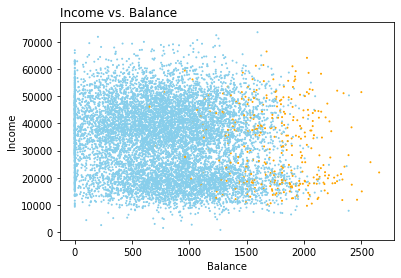

In [85]:
default_Yes=default_dummy['default_Yes'] 
default_Yes.head()
my_color=np.where(default_Yes==1, 'orange', 'skyblue')


x=d4['balance']
y=d4['income']
plt.scatter(x, y, color=my_color, s=1, alpha=1)
 
# Add title and axis names
plt.title("Income vs. Balance", loc='left')
plt.xlabel('Balance')
plt.ylabel('Income')

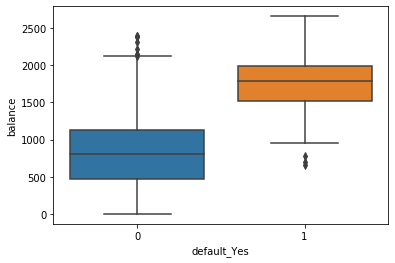

In [86]:
####### Figure 4.1(JWHT): Boxplots of balance as a function of default status 
import seaborn as sns

ax = sns.boxplot(x="default_Yes", y="balance", data=d4)


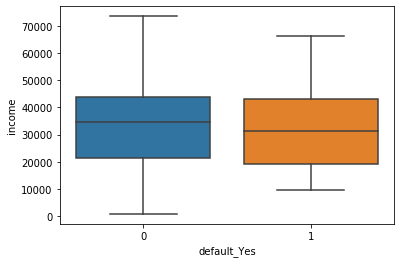

In [87]:
##### Boxplots of income as a function of default status
ax = sns.boxplot(x="default_Yes", y="income", data=d4)

# Part D : Perform Logistic Regression 

Table 4.1 (JWHT): Fit a logistic regression to predict probability of default based on card balance

Reference: https://towardsdatascience.com/logistic-regression-python-7c451928efee


In [108]:
X = d4['balance'].values.reshape(-1,1)
y = d4['default_Yes'].values.reshape(-1,1)
 

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)


[[0.00549892]]
[-10.65132824]


C:\Users\rashraf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [109]:
#Table 4.2 (JWHT): Test whether students are more likely to default using logistic regression  


X = d4['student_Yes'].values.reshape(-1,1)
y = d4['default_Yes'].values.reshape(-1,1)
 

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)


[[0.39960123]]
[-3.50213253]


C:\Users\rashraf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [111]:
type(X)

numpy.ndarray

In [112]:
#Table 4.3 (JWHT): Fit a logistic regression to predict probability of default based on card balance, income, and student status 

X = d4[['balance', 'income', 'student_Yes']].values


lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)


[[ 4.08201022e-03 -1.33893466e-04 -3.89009045e+00]]
[-2.9508496]


C:\Users\rashraf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [113]:
type(X)

numpy.ndarray

In [110]:
###################TO PRINT SUMMARY ######################################################
#SKLearn does not automatically print the concepts or have a method like summary. 
#So we have to print the coefficients separately. 

## Alternatively to see the summary of the model: use the following method ###############


X1=d4[['balance', 'income', 'student_Yes']]

X1 = sm.add_constant(X1) ##  ## let's add an intercept (beta_0) to our model


# Note the difference in argument order
model = sm.Logit(y, X1).fit() 

# Print out the statistics
model.summary()

C:\Users\rashraf\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\rashraf\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\rashraf\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: inf
         Iterations 10


C:\Users\rashraf\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Wed, 14 Oct 2020   Pseudo R-squ.:                     inf
Time:                        19:39:38   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance         0.0057      0.000     24.737      0.000       0.005       0.006
income       3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student_Yes    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Part E : Compute Default Probability Based on Predicted Model  

The predict() function: predicts the default probability for an individual on the basis of the predicted model.

DECIDE WHETHER A PERSON WILL DEFAULT OR NOT (ASSIGN YES=1 or NO=0)  

To predict whether a person will default, convert the predicted probabilities into labels Yes=1 or No=0.



In [116]:
####### COMPUTE DEFAULT PROBABILITY BASED ON THE PREDICTED MODEL  ################
#The predict() function: predicts the default probability for an individual on the basis of the predicted model.

y_pred = model.predict(X1)
#y_pred.describe()
#y_pred.shape
#type(y_pred)
y_pred

0       0.001429
1       0.001122
2       0.009812
3       0.000442
4       0.001936
5       0.001990
6       0.002334
7       0.001087
8       0.016383
9       0.000021
10      0.000011
11      0.011277
12      0.000081
13      0.000708
14      0.011982
15      0.000113
16      0.000022
17      0.000217
18      0.000373
19      0.010912
20      0.000083
21      0.004984
22      0.009416
23      0.000829
24      0.001780
25      0.002765
26      0.000863
27      0.081243
28      0.000733
29      0.006412
          ...   
9970    0.017776
9971    0.000030
9972    0.001514
9973    0.003240
9974    0.002277
9975    0.003707
9976    0.000072
9977    0.001997
9978    0.870888
9979    0.000056
9980    0.000861
9981    0.001495
9982    0.000815
9983    0.000405
9984    0.003375
9985    0.002699
9986    0.000104
9987    0.011412
9988    0.000022
9989    0.003260
9990    0.000174
9991    0.000983
9992    0.012691
9993    0.004910
9994    0.000028
9995    0.001323
9996    0.001560
9997    0.0028

In [117]:
######   DECIDE WHETHER A PERSON WILL DEFAULT OR NOT (ASSIGN YES=1 or NO=0)    #############################################

#To predict whether a person will default, convert the predicted probabilities into labels Yes=1 or No=0.

#The following command transforms all the elements with predicted probabilities of default greater than 0.5 to Yes=1

y_pred2 = y_pred.apply(lambda x: 1 if x > 0.5 else 0)
y_pred2.head()


y_pred2.describe()
type(y_pred2)


y_pred3 = y_pred2.values.reshape(-1,1)  # change to array 

# Use  confusion matrix to measure the accuracy of our model.

confusion_matrix(y, y_pred2)

array([[9627,   40],
       [ 228,  105]], dtype=int64)

In [70]:
### Print Accuracy of the model 
accuracy = np.mean(y_pred3 == y)
print ('accuracy = {0}%'.format(accuracy*100)  )


accuracy = 97.32%


# Part F: Model Accuracy, Recall, Preciaion, F-measure

In [118]:
#REF: https://towardsdatascience.com/understanding-the-confusion-matrix-and-how-to-implement-it-in-python-319202e0fe4d
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y, y_pred3)
print(accuracy_score)
# Recall
from sklearn.metrics import recall_score
recall=recall_score(y, y_pred3, average='binary')
print(recall)
# Precision
from sklearn.metrics import precision_score
precision=precision_score(y, y_pred3, average='binary')
print(precision)

0.9732
0.3153153153153153
0.7241379310344828


In [72]:
# Method 1: sklearn
from sklearn.metrics import f1_score
f1_score(y, y_pred3, average='binary')

0.4393305439330544

In [73]:
# Method 2: Manual Calculation
F1 = 2 * (precision * recall) / (precision + recall)
print(F1)

0.4393305439330544


# Part G : Overall Analysis
 
Overall Accuracy=(9627+105)/10,000=97.32%: pretty high accuracy

TPR (recall) = 105/(228+105) = 31.53%: 

out of all actual default cases only 31.5% were predicted right (as default category) by the model
Therefore the model is identifying a bad client (default category) as good (non-default category) 228/333=68.5% of the time. Conversely, 68.5% of the actual default cetegory were indentified as non-default category by the model. 
Credit card company which is trying to identify high risk individuals: an error rate of 68.5% would be unacceptable

Precision=105/(105+40)=72.41%

Out of 145 predicted to be positive (default category), 72.41% are actually true. 
 

F-measure = 2X0.3153X0.7241/(0.3153+0.7241)= 43.93%


Specificity or True Negative Rate (TNR)=9627/(9627+40)=99.58%

99.6% of actual false cases (non-default category) was identified correctly as non-default
Model is able to identify good customers fairly accurately

FPR=1-Specificity=40/(9627+40)=0.42%
Pretty low error rate (0.41%) of FPR.
Only 40 out of 9667 individual who did not actually default were incorrectly labeled as default category (false positive rate). 
Low rejection rate of good customers 

# Part H : Selecting Threshold 

TRY A LOWER Threshhold : pred_prob>.3 

In [119]:
y_pred2 = y_pred.apply(lambda x: 1 if x > 0.3 else 0)
y_pred2.head()


y_pred2.describe()
type(y_pred2)


y_pred3 = y_pred2.values.reshape(-1,1)  # change to array 

# Use  confusion matrix to measure the accuracy of our model.

confusion_matrix(y, y_pred2)

### FALSE Negative = 164/333 = 49.25%
### False Positive = 137/9667 = 1.42%

array([[9530,  137],
       [ 164,  169]], dtype=int64)

In [26]:
### Print Accuracy of the model 

# Correct prediction  =96.99% (lower than theshold 0.5)

accuracy = np.mean(y_pred3 == y)
print ('accuracy = {0}%'.format(accuracy*100)  )


accuracy = 96.99%


# Part I : Understanding AUC - ROC Curve 

Code SOURCE: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

Reading Source: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc


Logistic: ROC AUC=0.950


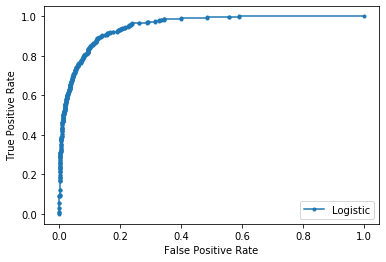

In [120]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate scores

lr_auc = roc_auc_score(y, y_pred)
# summarize scores

print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves


lr_fpr, lr_tpr, thresholds = roc_curve(y,  y_pred)
# plot the roc curve for the model

pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
